In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
data = pd.read_excel('C:/Users/adity/Documents/Visualization.xlsx')

In [3]:
data['Challenger Difference'] = data['Actual Sales'] - data['Challenger Forecast']
data['Champion Difference'] = data['Actual Sales'] - data['Champion Forecast']

In [4]:
data

,Date,Market,Channel,Actual Sales,Challenger Forecast,Champion Forecast,Challenger Difference,Champion Difference
0,2017-07-01,USA,Channel A,3773,3226,3877,547,-104
1,2017-07-01,USA,Channel B,1779,1787,1514,-8,265
2,2017-07-01,USA,Channel C,18454,20346,21124,-1892,-2670
3,2017-08-01,USA,Channel A,3498,3233,4488,265,-990
4,2017-08-01,USA,Channel B,2057,1991,1834,66,223
5,2017-08-01,USA,Channel C,16081,21824,21142,-5743,-5061
6,2017-09-01,USA,Channel A,3175,3340,3824,-165,-649
7,2017-09-01,USA,Channel B,1594,1428,1575,166,19
8,2017-09-01,USA,Channel C,12737,11407,19448,1330,-6711
9,2017-10-01,USA,Channel A,3656,3478,3852,178,-196


In [5]:
def forecast(data,Channel,title):
    data_filter = data[data['Channel'] == Channel]
    fig = plt.figure(figsize = (10,6))
    ax = fig.add_subplot(111)
    ax.plot(data_filter['Date'],data_filter['Actual Sales'],color = 'blue', linewidth = 2, alpha = 0.8)
    ax.plot(data_filter['Date'],data_filter['Challenger Forecast'],color = 'red', linewidth = 2, alpha = 0.8)
    ax.plot(data_filter['Date'],data_filter['Champion Forecast'],color = 'black', linewidth = 2, alpha = 0.8)
    ax.set_title(title)
    ax.set_xlabel('Date')
    ax.set_ylabel('Channel')
    handles, labels = ax.get_legend_handles_labels()
    ax.legend(handles, labels)
    plt.show()

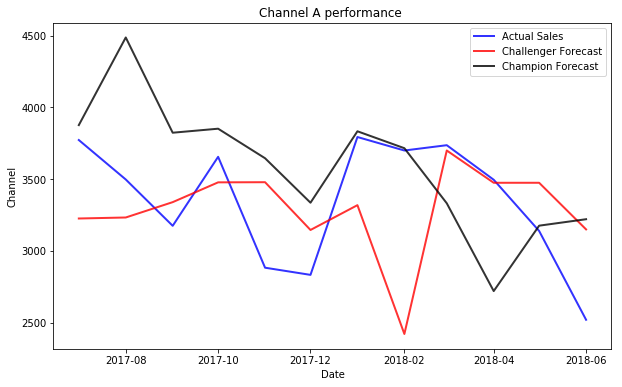

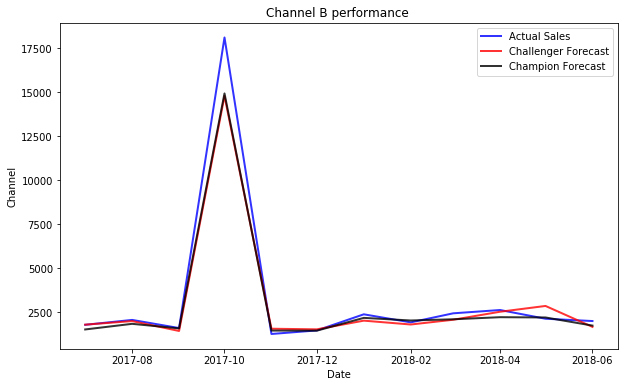

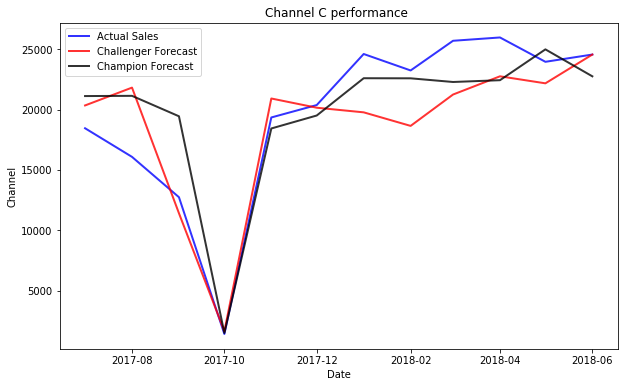

In [6]:
c = ['Channel A','Channel B','Channel C']
for i in range(0,len(c)):
    title = (c[i]+" performance ")
    forecast(data,c[i],title)

### Channel A - Both forecasts do not represent actual sales. The champion forecast in most situations is over estimated as compared to actual sales.The challenger forecast has too much difference for most months and is inaccurate. Better strategies have to be devised to forecast sales for channel A.
### Channel B - The challenger and champion forecast are similar in performnce and are very close to predicting actual sales.
### Channel C - The champion forecast does a great job of predicting actual sales compared to the challenger forecast.

In [30]:
def forecast_error(data,Channel,title):
    data_filter = data[data['Channel']==Channel]
    index = data_filter['Date'].unique()
    fig = plt.figure(figsize=(16,6))
    ax = fig.add_subplot(111)
    y_pos = np.arange(len(index))
    bar_width = 0.3
    opacity = 0.5
    plt.grid(zorder=0)
    plt.bar(y_pos, data_filter['Challenger Difference'], bar_width,alpha=opacity,color='blue',label='Challenger Forecast Error')
    for i,j in zip(y_pos,data_filter['Challenger Difference']):
        if j>0:
            ax.annotate(str(j),xy=(i-0.1,j+10), fontsize = 15)
        else:
            ax.annotate(str(j),xy=(i-0.15,j-45), fontsize = 15)
    plt.bar(y_pos+bar_width, data_filter['Champion Difference'], bar_width,alpha=opacity,color='green',label='Champion Forecast Error')
    for i,j in zip(y_pos+bar_width, data_filter['Champion Difference']):
        if j>0:
            ax.annotate(str(j),xy=(i-0.1,j+10), fontsize = 15)
        else:
            ax.annotate(str(j),xy=(i-0.15,j-45), fontsize = 15)
    plt.title(title, fontsize = 25, weight = 'bold')
    plt.xticks(y_pos,index)
    plt.tight_layout()
    plt.legend()
    plt.show()

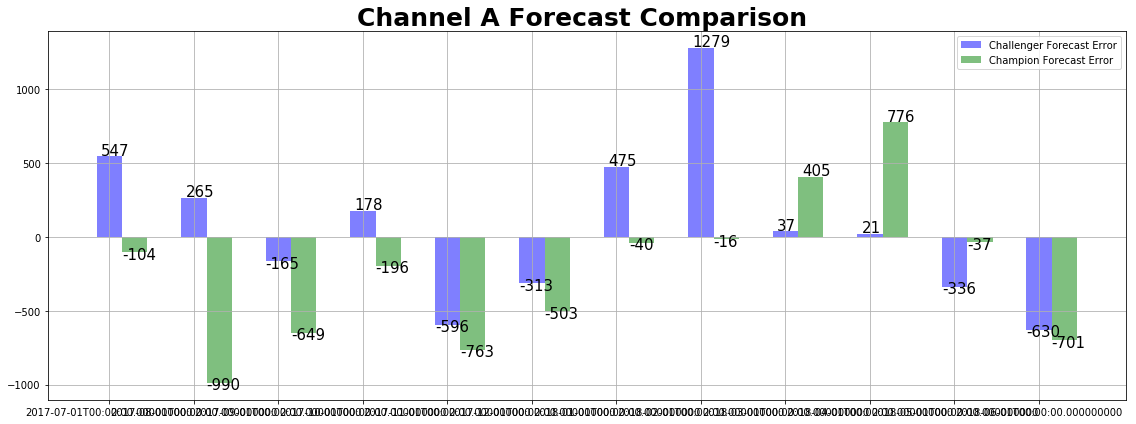

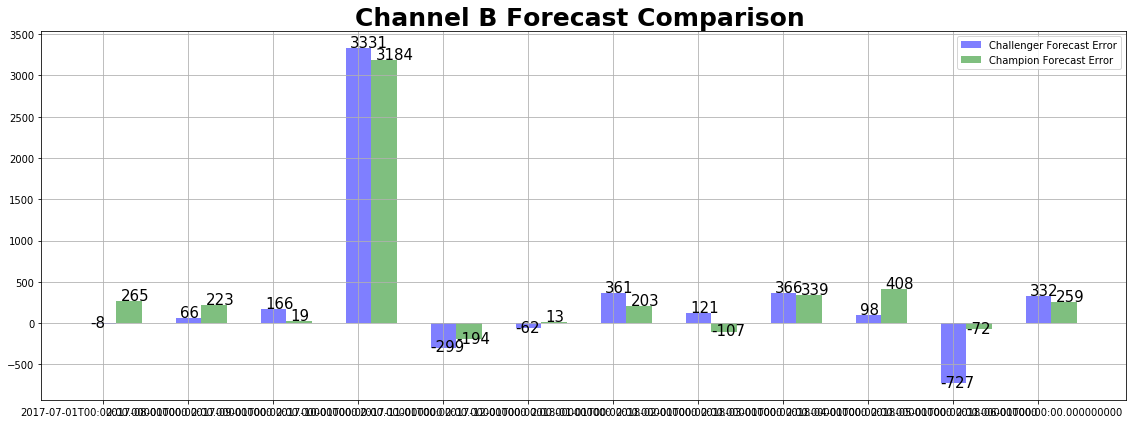

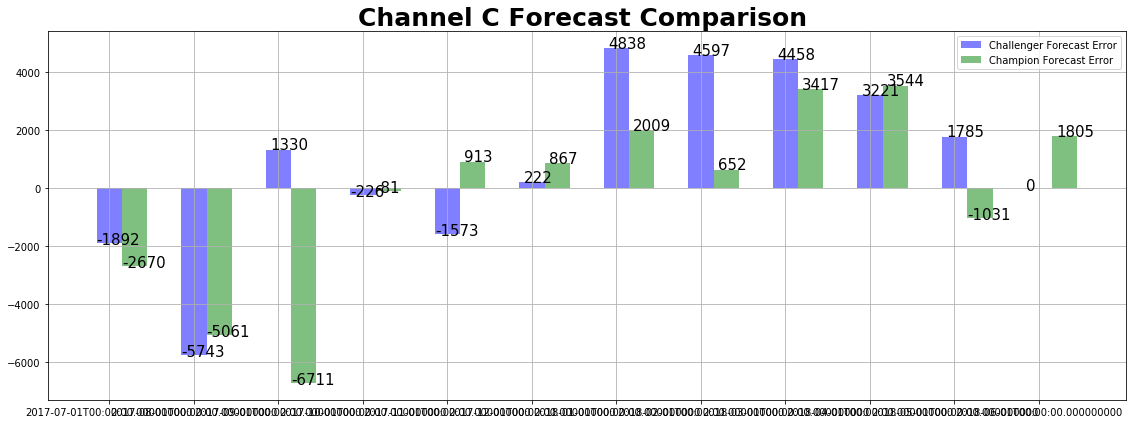

In [31]:
c = ['Channel A','Channel B','Channel C']
for i in range(0,len(c)):
    title = (c[i]+" Forecast Comparison ")
    forecast_error(data,c[i],title)